# Исследование сервиса для чтения книг по подписке

## Цель исследования

Сформулировать ценностное предложение для сервиса для чтения книг по подписке на основе имеющихся данных.

## Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.


### Схема связей в БД
![Схема связей в БД](https://concrete-web-bad.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F069818d1-0e5c-4d87-a461-0de584ab9c33%2FUntitled_(33).png?table=block&id=bd53c8db-b4fd-49eb-8cc9-572ebb3c9163&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&width=2000&userId=&cache=v2 "Схема связей в БД")

## Оглавление

1. [Импорт библиотек и настройка подключения](#Импорт-библиотек-и-настройка-подключения)
2. [№1. Посчитать, сколько книг вышло после 1 января 2000 года](#№1.-Посчитать,-сколько-книг-вышло-после-1-января-2000-года)
    1. [Выводы](#sum1)
3. [№2. Посчитать для каждой книги количество обзоров и среднюю оценку](#№2.-Посчитать-для-каждой-книги-количество-обзоров-и-среднюю-оценку)
    1. [Выводы](#sum2)
4. [№3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц](#№3.-Определить-издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц)
    1. [Выводы](#sum3)
5. [№4. Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками](#№4.-Определить-автора-с-самой-высокой-средней-оценкой-книг-—-учитывать-только-книги-с-50-и-более-оценками)
    1. [Выводы](#sum4)
6. [№5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок](#№5.-Посчитать-среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок)
    1. [Выводы](#sum5)

## Импорт библиотек и настройка подключения

In [1]:
# создадим функцию для получения результатов запроса
def get_query(query):
    """
    Функция для получения резльтата SQL-запроса.
    
    Функция принимает следующие параметры:
    query - SQL запрос в виде строки
    """
    # возвращаем результат SQL-запроса 
    return pd.io.sql.read_sql(query, con = engine) 

In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [3]:
# устанавливаем параметры подключения к БД
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных


connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])


# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

Выведем первые 5 строк для каждой таблицы в базе данных.

In [4]:
# создадим список с названиями таблиц в БД
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']
dfs = []

# выведем первые 5 строк для каждой таблицы из списка
for table in tables:
    query = 'SELECT * FROM {}'.format(table)
    db_table = get_query(query)
    print()
    print('Таблица {}'.format(table))
    print()
    display(db_table.head(5))
    dfs.append(db_table)


Таблица books



,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



Таблица authors



,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



Таблица publishers



,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



Таблица ratings



,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



Таблица reviews



,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## №1. Посчитать, сколько книг вышло после 1 января 2000 года

In [5]:
# создадим запрос
query = '''
    SELECT COUNT(book_id) as count
    FROM books
    WHERE publication_date >= '2000-01-01'
'''

# сохраним результат в переменную
db_table = get_query(query)

# выведем полученную таблицу
db_table

,count
0,821


<hr id="sum1">

### Выводы

С `1 января 2000 года` была выпущена `821` книга.

## №2. Посчитать для каждой книги  количество обзоров и среднюю оценку

In [6]:
# создадим запрос
query = '''
    SELECT b.book_id, COUNT(DISTINCT review_id) as reviews, ROUND(AVG(rt.rating), 2) AS rating
    FROM books as b
    LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
    LEFT JOIN ratings AS rt ON b.book_id = rt.book_id
    GROUP BY b.book_id
'''

# сохраним результат в переменную
db_table = get_query(query)

# выведем полученную таблицу
db_table

,book_id,reviews,rating
0,1,2,3.67
1,2,1,2.50
2,3,3,4.67
3,4,2,4.50
4,5,4,4.00
...,...,...,...
995,996,3,3.67
996,997,3,3.40
997,998,4,3.20
998,999,2,4.50


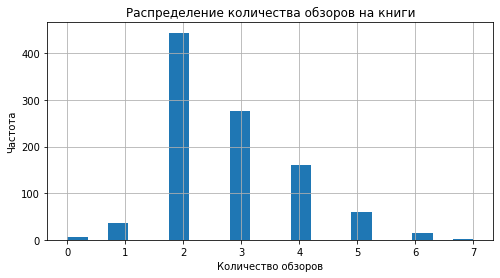

,reviews
count,1000.000000
mean,2.793000
std,1.074852
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,7.000000


In [7]:
# построим график распределения количества обзоров на книги
plt.figure(figsize=(8, 4))
db_table['reviews'].hist(bins=20)
plt.title('Распределение количества обзоров на книги')
plt.xlabel('Количество обзоров')
plt.ylabel('Частота')
plt.show()

# посчитаем статистические показатели
db_table['reviews'].describe().to_frame()

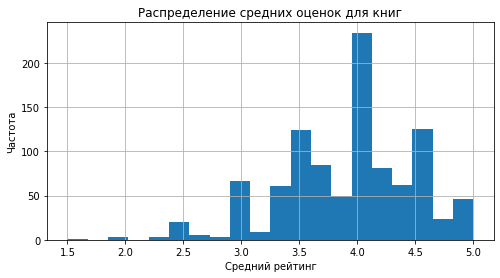

,rating
count,1000.000000
mean,3.899040
std,0.562388
min,1.500000
25%,3.500000
50%,4.000000
75%,4.330000
max,5.000000


In [8]:
# построим график распределения значений среднего рейтинга книг
plt.figure(figsize=(8, 4))
db_table['rating'].hist(bins=20)
plt.title('Распределение средних оценок для книг')
plt.xlabel('Средний рейтинг')
plt.ylabel('Частота')
plt.show()

# посчитаем статистические показатели
db_table['rating'].describe().to_frame()

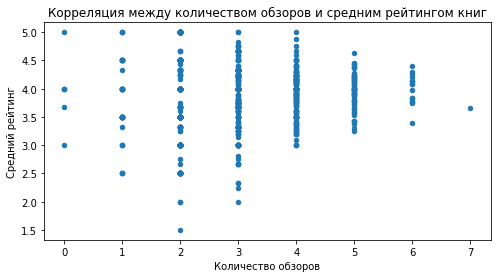

,reviews,rating
reviews,1.000000,0.017373
rating,0.017373,1.000000


In [9]:
# построим диаграмму корреляции между количеством обзоров и средним рейтингом книг
db_table.plot.scatter(x='reviews',
                      y='rating',
                      figsize=(8, 4))
plt.title('Корреляция между количеством обзоров и средним рейтингом книг')
plt.xlabel('Количество обзоров')
plt.ylabel('Средний рейтинг')
plt.show()

# посчитаем статистические показатели
db_table[['reviews', 'rating']].corr()

<hr id="sum2">

### Выводы

Исходя из полученных данных удалось собрать следующую информацию:
- cреднее количество обзоров на 1 книгу составляет `2.79`;
- около `50%` книг имеет не более `3` обзоров;
- средний рейтинг на одну книгу равен `3.89`;
- у `50%` книг средний рейтинг сооставляет не более `4`, а у `75%` - не более `4.3`;
- показатели среднего рейтинга и количество обзоров имеют слабую линейную связь, коэффициент Пирсона равен `0.0173`;
- на диаграмме корреляции можно заметить некоторые закономерности, например, книги имеющие от `4-х обзоров`, имеют средний рейтинг не ниже `3`.

## №3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц

In [10]:
# создадим запрос
query = '''
    SELECT p.publisher_id, p.publisher
    FROM books AS b
    LEFT JOIN publishers AS p ON p.publisher_id = b.publisher_id
    WHERE b.num_pages > 50
    GROUP BY p.publisher_id, p.publisher
    ORDER BY COUNT(DISTINCT b.book_id) DESC
    LIMIT 1
'''

# сохраним результат в переменную
db_table = get_query(query)

# выведем полученную таблицу
db_table

,publisher_id,publisher
0,212,Penguin Books


<hr id="sum3">

### Выводы

Книжное издательство `Penguin Books` является издательством, выпустившим наибольшее число книг толще 50 страниц.

## №4. Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками

In [11]:
# создадим запрос
query = '''
    SELECT a.author_id, a.author, ROUND(AVG(rating), 2)
    FROM books AS b
    LEFT JOIN authors AS a ON b.author_id = a.author_id
    LEFT JOIN ratings AS r ON b.book_id = r.book_id
    WHERE b.book_id IN (
        SELECT b.book_id
        FROM books AS b
        LEFT JOIN ratings AS r ON r.book_id = b.book_id
        GROUP BY b.book_id
        HAVING COUNT(rating_id) >= 50
    )
    GROUP BY a.author_id, a.author
    ORDER BY AVG(rating) DESC
    LIMIT 1
'''

# сохраним результат в переменную
db_table = get_query(query)

# выведем полученную таблицу
db_table

,author_id,author,round
0,236,J.K. Rowling/Mary GrandPré,4.29


<hr id="sum4">

### Выводы

Автором с самой высокой средней оценкой книг (среди книги с 50 и более оценками) является `J.K. Rowling/Mary GrandPré` со средним рейтингом `4.29`.

## №5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [12]:
# создадим запрос
query = '''
    SELECT ROUND(AVG(rv.reviews), 2) AS avg_reviews
    FROM (
        WITH users AS (
            SELECT r.username
            FROM books AS b
            LEFT JOIN ratings AS r ON b.book_id = r.book_id
            GROUP BY r.username
            HAVING COUNT(rating_id) > 50
        )
        SELECT COUNT(rv.review_id) as reviews
        FROM books AS b
        LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
        WHERE rv.username IN (SELECT * FROM users)
        GROUP BY username
    ) as rv
'''

# сохраним результат в переменную
db_table = get_query(query)

# выведем полученную таблицу
db_table

,avg_reviews
0,24.33


<hr id="sum5">

### Выводы

Среднее количество обзоров от пользователей, которые поставили больше 50 оценок составляет `24.33`.